In [163]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [164]:
df_train = pd.read_csv('titanic_train.csv')
df_train.head()
df_test = pd.read_csv('titanic_test.csv')
df_test.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,3,0,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S,NaN,NaN
1,2,1,"Phillips, Miss. Alice Frances Louisa",female,21.0,0,1,S.O./P.P. 2,21.0000,NaN,S,NaN,"Ilfracombe, Devon"
2,2,0,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,NaN,S,NaN,London
3,3,0,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN
4,2,0,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5000,NaN,S,NaN,"Guernsey / Elizabeth, NJ"


데이터 확인

In [165]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     916 non-null    int64  
 1   survived   916 non-null    int64  
 2   name       916 non-null    object 
 3   sex        916 non-null    object 
 4   age        741 non-null    float64
 5   sibsp      916 non-null    int64  
 6   parch      916 non-null    int64  
 7   ticket     916 non-null    object 
 8   fare       916 non-null    float64
 9   cabin      214 non-null    object 
 10  embarked   914 non-null    object 
 11  body       85 non-null     float64
 12  home.dest  527 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 93.2+ KB


In [166]:
df_train.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,916.000000,916.000000,741.000000,916.000000,916.000000,916.000000,85.000000
mean,2.292576,0.385371,30.231444,0.532751,0.371179,32.532050,157.870588
std,0.842576,0.486949,13.934240,1.125957,0.837508,47.416524,98.257653
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,68.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,148.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,249.000000
max,3.000000,1.000000,74.000000,8.000000,9.000000,512.329200,328.000000


In [167]:
df_train.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'body', 'home.dest'],
      dtype='object')

name,cabin의 데이터를 추가

In [168]:
# 데이터 중 name ticket cabin body home.dest
df_train = df_train.drop(['ticket','body','home.dest'],axis=1)
df_test = df_test.drop(['ticket','body','home.dest'],axis=1)

데이터 전처리

In [169]:
# age 데이터의 평균으로 결측치 처리
# nan 값을 제외한 age의 평균값

# 결측치에 넣을 평균값 - train,test 세트 모두 적용
replace_mean = df_train[df_train['age']>0]['age'].mean()
df_train['age'] = df_train['age'].fillna(replace_mean)
df_test['age'] = df_test['age'].fillna(replace_mean)

# embark : 결측값 - 데이터 2개
# 데이터 중 가장 많이 나온 결과의 값을 대체
embarked_mode = df_train['embarked'].value_counts().index[0]
df_train['embarked'] = df_train['embarked'].fillna(embarked_mode)
df_test['embarked'] = df_test['embarked'].fillna(embarked_mode)

In [170]:
# train, test 세트 합치기
whole_df = pd.concat([df_train,df_test])

In [171]:
# 원한 인코딩 한 후 train,test 세트를 분리
train_idx_num = len(df_train)
train_idx_num

916

In [172]:
# canbin
whole_df['cabin'].value_counts().head()

cabin
C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
F4                 4
B96 B98            4
Name: count, dtype: int64

In [173]:
# 결측치 데이터를 X 로 대체
whole_df['cabin'] = whole_df['cabin'].fillna('X')

In [174]:
whole_df['cabin'] = whole_df['cabin'].str[0]

In [175]:
whole_df['cabin'].value_counts()

cabin
X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [176]:
# 항목 중 데이터가 적은 수는 X로 대체
whole_df['cabin'] = whole_df['cabin'].replace({'G':'X','T':'X'})

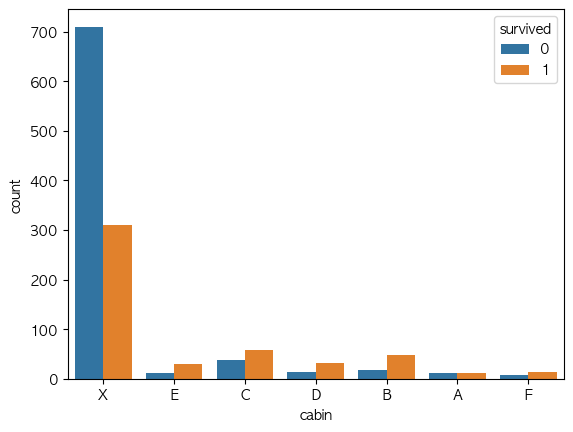

In [177]:
ax = sns.countplot(x='cabin',hue='survived',data=whole_df)

In [178]:
# name 피처 전처리
# , 기준으로 분리해서 
whole_df['name'] = whole_df['name'].str.split(',').str[1].str.strip()

In [179]:
# , 기준으로 분리해서 앞부분을 저장
whole_df['name'] = whole_df['name'].str.split('.').str[0].str.strip()

In [180]:
whole_df['name'].unique()

array(['Miss', 'Mr', 'Master', 'Mrs', 'Dr', 'Mlle', 'Col', 'Rev', 'Ms',
       'Mme', 'Sir', 'the Countess', 'Dona', 'Jonkheer', 'Lady', 'Major',
       'Don', 'Capt'], dtype=object)

In [181]:
# 호칭에 따른 사회적 지위를 파악
grade_dict = {'A': ['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'], # 명예직을 나타냅니다.
              'B': ['Ms', 'Mme', 'Mrs', 'Dona'], # 여성을 나타냅니다.
              'C': ['Jonkheer', 'the Countess'], # 귀족이나 작위를 나타냅니다.
              'D': ['Mr', 'Don'], # 남성을 나타냅니다.
              'E': ['Master'], # 젊은남성을 나타냅니다.
              'F': ['Miss', 'Mlle', 'Lady']} # 젊은 여성을 나타냅니다.

In [182]:
# 함수를 적용해서 데이터 적용
def give_grade(x):
    for key,value in grade_dict.items():
        for title in value:
            if x == title:
                return key
    return 'G'
whole_df['name'] = whole_df['name'].apply(lambda x: give_grade(x))

In [183]:
whole_df['name'].value_counts()

name
D    758
F    263
B    201
E     61
A     24
C      2
Name: count, dtype: int64

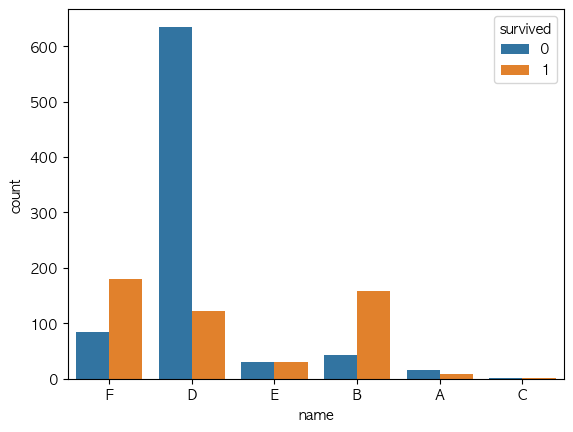

In [184]:
ax = sns.countplot(x='name',hue='survived',data=whole_df)

In [186]:
# 원핫인코딩
whole_df_encoed = pd.get_dummies(whole_df)
df_train2 = whole_df_encoed[:train_idx_num]
df_test2 = whole_df_encoed[train_idx_num:]

In [187]:
df_train2

,pclass,survived,age,sibsp,parch,fare,name_A,name_B,name_C,name_D,...,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_X,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,2,1,4.000000,1,1,23.0000,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,2,1,30.000000,1,0,13.8583,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3,3,0,30.231444,0,0,7.7250,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
4,3,1,22.000000,0,0,7.7250,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,3,1,0.170000,1,2,20.5750,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
912,3,0,30.231444,0,0,8.0500,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
913,3,1,30.231444,0,0,7.7333,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
914,2,1,20.000000,0,0,36.7500,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [188]:
# train : 916
train_input = whole_df_encoed.iloc[:train_idx_num,whole_df_encoed.columns != 'survived']
train_target = whole_df_encoed['survived'][:train_idx_num]
# test : 393
test_input = whole_df_encoed.iloc[train_idx_num:,whole_df_encoed.columns != 'survived']
test_target = whole_df_encoed['survived'][train_idx_num:]

In [189]:
# 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [190]:
# 로지스틱회귀
lr = LogisticRegression()
lr.fit(train_scaled,train_target)

LogisticRegression()

In [191]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.8187772925764192
0.7964376590330788


In [192]:
predict = lr.predict(test_scaled)

In [193]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=test_target,y_pred=predict)

In [194]:
confmat

array([[207,  39],
       [ 41, 106]])

In [195]:
# 경사하강법
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss',max_iter=10, random_state=42)
sc.fit(train_scaled,train_target)

/opt/homebrew/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [196]:
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7161572052401747
0.6972010178117048


In [197]:
classes = np.unique(train_target)

In [198]:
train_score = []
test_score = []
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

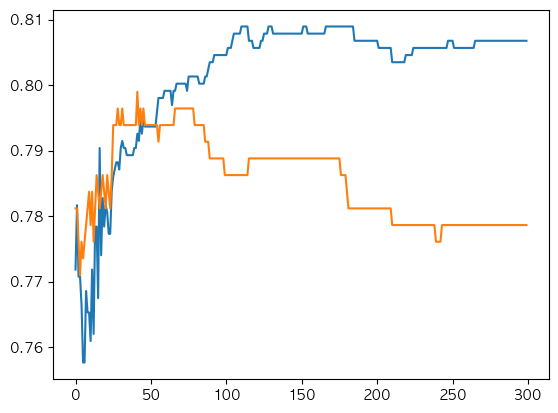

In [199]:
plt.plot(train_score)
plt.plot(test_score)

In [200]:
# 검증세트 - cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

splitter = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
score = cross_validate(lr,train_scaled,train_target,cv=splitter)

In [201]:
np.mean(score['test_score'])

0.8067128523650263

In [202]:
# 랜덤포레스트
rf = RandomForestClassifier(max_depth=3,n_jobs=-1,random_state=42)
scores = cross_validate(rf,train_input,train_target,return_train_score=True,n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.798579831368953 0.7969351389878832
